In [1]:
import curriculaLDA
from tqdm import tqdm

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/osama.nasir@ebryx.com/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import nltk
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
#%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [3]:
#df_tmp = curriculaLDA.loadCurricula()

In [4]:
#df_tmp.to_excel("engg_curricula.xlsx", engine='xlsxwriter')
#len(df_tmp)

# Preprocessing Data

In [5]:
df = pd.read_excel('engg_curricula.xlsx')
#df = df_tmp

In [6]:
df.head()

,Unnamed: 0,filename,text
0,0,syllabus.pdf,CS 104 - Topics in Introductory Programming: S...
1,1,Syllabus of Introduction to Data Ethics.pdf,\n\nSyllabus of Introduction to Data Ethics \...
2,2,Syllabus_DS-GA-3001.009_SP_2019.pdf,DS­GA 3001.009: Special Topics in Data \nScien...
3,3,Professional Responsibility in Computer Scienc...,Course CS/SE 3162 Professional Responsibility...
4,4,Artificial Intelligence & Science Fiction.pdf,P\na\ng\ne\n \n2\n2\n.\n1\n5\n2\n.\n\n1\n\nAC2...


In [7]:
len(df)

90

In [8]:
corpus, id2word, data_lemmatized = curriculaLDA.preprocessData(df)

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/home/osama.nasir@ebryx.com/anaconda3/envs/myenv/lib/python3.7/site-packages/en_core_web_sm
-->
/home/osama.nasir@ebryx.com/anaconda3/envs/myenv/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [9]:
len(data_lemmatized)

90

In [10]:
len(corpus)

90

In [11]:
len(id2word)

1608

# Building Model

In [12]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3,
                                           random_state=100,
                                           update_every=10,
                                           chunksize=5,
                                           passes=100,
                                           alpha='auto',
                                           per_word_topics=True)

In [13]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.030*"datum" + 0.016*"science" + 0.012*"assignment" + 0.011*"data" + '
  '0.011*"analysis" + 0.011*"research" + 0.010*"reading" + 0.009*"activity" + '
  '0.009*"slide" + 0.009*"lab"'),
 (1,
  '0.009*"reading" + 0.008*"project" + 0.008*"discussion" + 0.008*"technology" '
  '+ 0.008*"may" + 0.007*"ai" + 0.006*"question" + 0.006*"make" + '
  '0.006*"issue" + 0.005*"lecture"'),
 (2,
  '0.012*"information" + 0.009*"ai" + 0.008*"study" + 0.008*"system" + '
  '0.007*"policy" + 0.007*"learn" + 0.007*"ethical" + 0.006*"research" + '
  '0.006*"engineering" + 0.006*"link"')]


In [14]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, corpus=corpus, texts=data_lemmatized, dictionary=id2word, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.849749614491521

Coherence Score:  -0.6232955822705105


In [18]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = '/home/osama.nasir@ebryx.com/Personal/Studies/AI_Ethics/Engineering_Ethics/lda/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=9, id2word=id2word)

# Show Topics
pprint(ldamallet.show_topics(formatted=False, num_words=10))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='u_mass')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('assignment', 0.03624025411492925),
   ('project', 0.026710944267975743),
   ('presentation', 0.024400808547502165),
   ('paper', 0.017903551833670227),
   ('material', 0.01559341611319665),
   ('write', 0.015304649148137454),
   ('participation', 0.015160265665607854),
   ('final', 0.014871498700548658),
   ('post', 0.013860814322841466),
   ('grade', 0.012850129945134276)]),
 (1,
  [('information', 0.0479309318249479),
   ('ethical', 0.03602262578148258),
   ('study', 0.02947305745757666),
   ('examination', 0.02828222685323013),
   ('choose', 0.022625781482584102),
   ('content', 0.020541827924977673),
   ('technology', 0.020541827924977673),
   ('offer', 0.01964870497171777),
   ('apply', 0.01816016671628461),
   ('problem', 0.017564751414111342)]),
 (2,
  [('datum', 0.045060999606454155),
   ('research', 0.04466745375836285),
   ('science', 0.03089334907516726),
   ('engineering', 0.03089334907516726),
   ('system', 0.024793388429752067),
   ('design', 0.02302243211334120

In [41]:
ldamallet.save("malletmodel_lda")


In [42]:
ldamallet2 = gensim.models.wrappers.LdaMallet.load("malletmodel_lda")

In [47]:
# Show Topics
topics = ldamallet.show_topics(formatted=False, num_words=10)
topics_s = sorted(topics, key=lambda x: x[1])
for topic in topics_s:
    keys = []
    for key in topic[1]:
        keys.append(key[0])
    print(keys)

['ai', 'application', 'apply', 'include', 'policy', 'development', 'learn', 'system', 'language', 'technology']
['assignment', 'project', 'presentation', 'paper', 'material', 'write', 'participation', 'final', 'post', 'grade']
['datum', 'research', 'science', 'engineering', 'system', 'design', 'project', 'ethical', 'social', 'method']
['information', 'program', 'online', 'require', 'complete', 'credit', 'provide', 'learn', 'form', 'basic']
['information', 'ethical', 'study', 'examination', 'choose', 'content', 'technology', 'offer', 'apply', 'problem']
['lecture', 'topic', 'link', 'part', 'detail', 'final', 'lab', 'day', 'read', 'quiz']
['question', 'philosophy', 'discussion', 'make', 'issue', 'robot', 'good', 'ai', 'human', 'essay']
['team', 'assessment', 'group', 'issue', 'professional', 'policy', 'code', 'activity', 'practice', 'case']
['technology', 'privacy', 'computer', 'reading', 'software', 'system', 'chapter', 'machine', 'social', 'optional']


In [28]:
# Show Topics
topics = ldamallet.show_topics(num_topics=10, formatted=False, num_words=20)
topics_s = sorted(topics, key=lambda x: x[1])
for topic in topics_s:
    keys = []
    for key in topic[1]:
        keys.append(key[0])
    print(keys)

['ai', 'application', 'apply', 'include', 'policy', 'development', 'learn', 'system', 'technology', 'language', 'artificial_intelligence', 'study', 'time', 'key', 'undergraduate', 'cookie', 'support', 'theory', 'search', 'university']
['assignment', 'project', 'presentation', 'paper', 'material', 'write', 'participation', 'final', 'post', 'grade', 'include', 'discussion', 'date', 'late', 'assign', 'require', 'homework', 'make', 'section', 'submit']
['datum', 'research', 'science', 'engineering', 'system', 'design', 'project', 'ethical', 'social', 'method', 'data', 'human', 'engineer', 'analysis', 'model', 'part', 'intelligent', 'visit', 'study', 'society']
['information', 'program', 'online', 'require', 'complete', 'credit', 'provide', 'learn', 'form', 'basic', 'receive', 'campus', 'page', 'professional', 'time', 'request', 'process', 'check', 'website', 'number']
['information', 'ethical', 'study', 'examination', 'choose', 'content', 'technology', 'offer', 'apply', 'problem', 'base', 

In [45]:
# Show Topics
topics = ldamallet2.show_topics(num_topics=10, formatted=False, num_words=15)
topics_s = sorted(topics, key=lambda x: x[1])
for topic in topics_s:
    keys = []
    for key in topic[1]:
        keys.append(key[0])
    print(keys)

['ai', 'application', 'apply', 'include', 'policy', 'learn', 'development', 'system', 'language', 'technology', 'artificial_intelligence', 'study', 'time', 'key', 'undergraduate']
['assignment', 'project', 'presentation', 'paper', 'material', 'write', 'participation', 'final', 'post', 'grade', 'include', 'discussion', 'date', 'late', 'assign']
['datum', 'research', 'science', 'engineering', 'system', 'design', 'project', 'ethical', 'social', 'method', 'data', 'human', 'engineer', 'analysis', 'model']
['information', 'program', 'online', 'require', 'complete', 'credit', 'provide', 'learn', 'form', 'basic', 'receive', 'campus', 'page', 'professional', 'time']
['information', 'ethical', 'study', 'examination', 'choose', 'technology', 'content', 'offer', 'apply', 'problem', 'base', 'search', 'web', 'field', 'literature']
['lecture', 'topic', 'link', 'part', 'detail', 'final', 'lab', 'day', 'read', 'quiz', 'note', 'page', 'goal', 'internet', 'reading']
['question', 'philosophy', 'discussion

In [29]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, corpus=corpus, texts=texts, dictionary=dictionary, coherence='u_mass')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Can take a long time to run.
#model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

In [30]:
# Show graph
#limit=40; start=2; step=6;
#x = range(start, limit, step)
#plt.plot(x, coherence_values)
#plt.xlabel("Num Topics")
#plt.ylabel("Coherence score")
#plt.legend(("coherence_values"), loc='best')
#plt.show()

In [31]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_lemmatized):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

optimal_model = ldamallet
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data_lemmatized)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.2961,"lecture, topic, link, part, detail, final, lab...","[topic, introductory, program, social, inquiry..."
1,1,3.0,0.3164,"technology, privacy, computer, reading, softwa...","[introduction, ethic, cremonini, lesson, first..."
2,2,2.0,0.2110,"datum, research, science, engineering, system,...","[special, topic, data, science, responsible, d..."
3,3,0.0,0.3891,"assignment, project, presentation, paper, mate...","[term, meeting, phone, phone, phone, number, o..."
4,4,7.0,0.3699,"question, philosophy, discussion, make, issue,...","[scifi, teachingwrite, history, tech, nology, ..."
5,5,2.0,0.3734,"datum, research, science, engineering, system,...","[title, intelligence, design, principle, modul..."
6,6,3.0,0.2270,"technology, privacy, computer, reading, softwa...","[ethic, ai, draft, long, general, information,..."
7,7,8.0,0.1921,"team, assessment, group, issue, professional, ...","[area, require, area, option, optional, catego..."
8,8,0.0,0.2426,"assignment, project, presentation, paper, mate...","[information, system, computer, ethic, phone, ..."
9,9,3.0,0.4536,"technology, privacy, computer, reading, softwa...","[ethical, foundation, design, management, info..."


In [32]:
df_dominant_topic.groupby('Dominant_Topic').count()

,Document_No,Topic_Perc_Contrib,Keywords,Text
Dominant_Topic,,,,
0.0,17,17,17,17
1.0,10,10,10,10
2.0,5,5,5,5
3.0,23,23,23,23
4.0,8,8,8,8
5.0,2,2,2,2
6.0,8,8,8,8
7.0,10,10,10,10
8.0,7,7,7,7


In [33]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.5745,"assignment, project, presentation, paper, mate...","[professional, ethic, compute, cpsc, descripti..."
1,1.0,0.7038,"information, ethical, study, examination, choo...","[course, study, research, co_operation, search..."
2,2.0,0.4654,"datum, research, science, engineering, system,...","[ethic, biomedical, engineering, university, m..."
3,3.0,0.4917,"technology, privacy, computer, reading, softwa...","[schedule, course, info, lecture, slide, meeti..."
4,4.0,0.5036,"lecture, topic, link, part, detail, final, lab...","[need, enable, order, access, site, dashboard,..."


In [34]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,4.0,"lecture, topic, link, part, detail, final, lab...",17.0,0.1889
1.0,3.0,"technology, privacy, computer, reading, softwa...",10.0,0.1111
2.0,2.0,"datum, research, science, engineering, system,...",5.0,0.0556
3.0,0.0,"assignment, project, presentation, paper, mate...",23.0,0.2556
4.0,7.0,"question, philosophy, discussion, make, issue,...",8.0,0.0889
...,...,...,...,...
85.0,7.0,"question, philosophy, discussion, make, issue,...",NaN,NaN
86.0,3.0,"technology, privacy, computer, reading, softwa...",NaN,NaN
87.0,4.0,"lecture, topic, link, part, detail, final, lab...",NaN,NaN
88.0,7.0,"question, philosophy, discussion, make, issue,...",NaN,NaN


In [35]:
# Visualize the topics
optimal_model = ldamallet
pyLDAvis.enable_notebook()
gmodel = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(optimal_model)
vis = pyLDAvis.gensim.prepare(gmodel, corpus, id2word)
vis

/home/osama.nasir@ebryx.com/anaconda3/envs/myenv/lib/python3.7/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/home/osama.nasir@ebryx.com/anaconda3/envs/myenv/lib/python3.7/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/home/osama.nasir@ebryx.com/anaconda3/envs/myenv/lib/python3.7/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.167114  0.117298       1        1  14.685873
7      0.174364 -0.020784       2        1  13.937661
3      0.091064 -0.307498       3        1  12.144897
8     -0.101198  0.081946       4        1  11.418071
6     -0.141845 -0.037859       5        1  11.130587
2     -0.069327 -0.224668       6        1  10.707317
4      0.259778  0.167418       7        1   9.505744
5     -0.201390  0.179462       8        1   9.305484
1     -0.178561  0.044686       9        1   7.164365, topic_info=              Term        Freq       Total Category  logprob  loglift
567             ai  396.000000  396.000000  Default  30.0000  30.0000
432    information  362.000000  362.000000  Default  29.0000  29.0000
58           datum  251.000000  251.000000  Default  28.0000  28.0000
135        lecture  230.000000  230.000000  Default  27.0000  27.0000
365     assignment  277.000000  277.000000  Default  26.0000  26.0000
..             ...         ...         ...      ...      ...      ...
579         aspect   31.136643   66.947908   Topic9  -4.7872   1.8705
177  participation   36.696758  153.922731   Topic9  -4.6229   1.2023
54          credit   33.360689  116.970012   Topic9  -4.7182   1.3815
302         follow   34.472712  190.675139   Topic9  -4.6854   0.9256
421          group   34.472712  237.334120   Topic9  -4.6854   0.7067

[716 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1065      1  0.969170   absence
501       1  1.033781    absent
1         4  0.445543  academic
1         6  0.330032  academic
1         8  0.148514  academic
...     ...       ...       ...
268       2  0.328039     write
268       9  0.182705     write
1256      3  0.931127     wrong
1256      7  0.064216     wrong
1381      8  0.983410      zoom

[950 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 8, 4, 9, 7, 3, 5, 6, 2])

In [40]:
pyLDAvis.save_html(vis, 'lda.html')

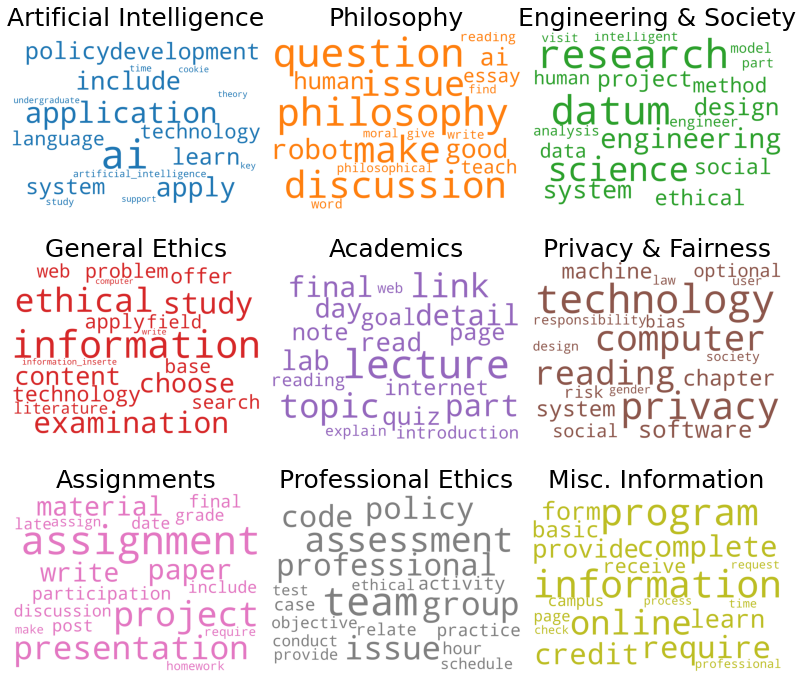

In [49]:
# creating word clouds for topics
from wordcloud import WordCloud, STOPWORDS

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'


cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=18,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamallet.show_topics(formatted=False, num_words=20)

fig, axes = plt.subplots(3, 3, figsize=(11,10), sharex=True, sharey=True)

topics_s = sorted(topics, key=lambda x: x[1])
topics_sorted = list()

topics_sorted.append(topics_s[0])
topics_sorted.append(topics_s[6])
topics_sorted.append(topics_s[2])
topics_sorted.append(topics_s[4])
topics_sorted.append(topics_s[5])
topics_sorted.append(topics_s[8])
topics_sorted.append(topics_s[1])
topics_sorted.append(topics_s[7])
topics_sorted.append(topics_s[3])
#topics_sorted.append(topics_s[9])

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics_sorted[i][1])
    #if i == 3:
        #topic_words.update(dict(topics_sorted[9][1]))
    cloud.generate_from_frequencies(topic_words, max_font_size=400)
    plt.gca().imshow(cloud)
    if i == 0:
        plt.gca().set_title('Artificial Intelligence', fontdict=dict(size=25))
    if i == 1:
        plt.gca().set_title('Philosophy', fontdict=dict(size=25))
    if i == 2:
        plt.gca().set_title('Engineering & Society', fontdict=dict(size=25))
    if i == 3:
        plt.gca().set_title('General Ethics', fontdict=dict(size=25))
    if i == 4:
        plt.gca().set_title('Academics', fontdict=dict(size=25))
    if i == 5:
        plt.gca().set_title('Privacy & Fairness', fontdict=dict(size=25))
    if i == 6:
        plt.gca().set_title('Assignments', fontdict=dict(size=25))
    if i == 7:
        plt.gca().set_title('Professional Ethics', fontdict=dict(size=25))
    if i == 8:
        plt.gca().set_title('Misc. Information', fontdict=dict(size=25))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.savefig("curriculaTopics.pdf", bbox_inches='tight')
plt.show()

In [74]:
new_data = []
for i, value in tqdm(enumerate(ldamallet[corpus])):
    row = []
    for item in value:
        if item[1] < 0.1:
            row.append(0)
        else:
            row.append(item[1])
    row.append(df[i:]['filename'].values[0])
    new_data.append(row)
new_df = pd.DataFrame(new_data)
new_df.columns = ['Topic 0', 'Topic 1', 'Topic 2', 'Document']
print(new_df.head())
new_df.to_excel('docs_with_topic.xlsx')

90it [00:00, 9820.43it/s]


ValueError: Length mismatch: Expected axis has 16 elements, new values have 4 elements

In [ ]:
df[0:]['filename'].values[0]

""

In [ ]:
print(len(new_df[new_df["Topic 0"]==0]))
print(len(new_df[new_df["Topic 1"]==0]))
print(len(new_df[new_df["Topic 2"]==0]))

In [ ]:
print(len(new_df[new_df["Topic 0"]>0.6]))
print(len(new_df[new_df["Topic 1"]>0.6]))
print(len(new_df[new_df["Topic 2"]>0.6]))